MAE: 3217279.5667280634
RMSE: 6752087.250909381
R2: 0.9161421321932643


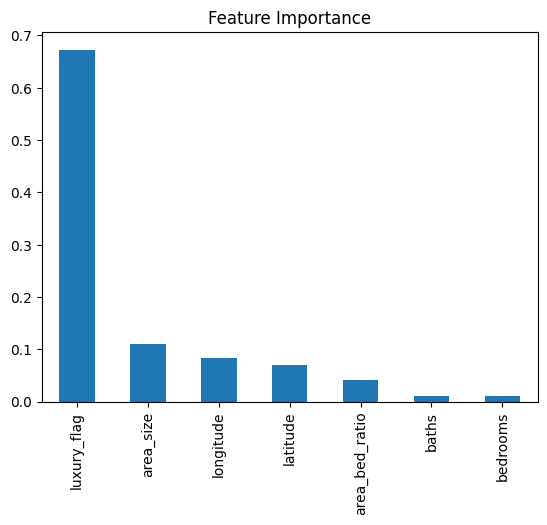

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('featured_zameen.csv')

cat_cols = ['property_type','city','province_name','purpose','area_type','area_category']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

X = df[['area_size','bedrooms','baths','latitude','longitude','area_bed_ratio','luxury_flag']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2:", r2_score(y_test, pred))

import matplotlib.pyplot as plt
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure()
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.show()


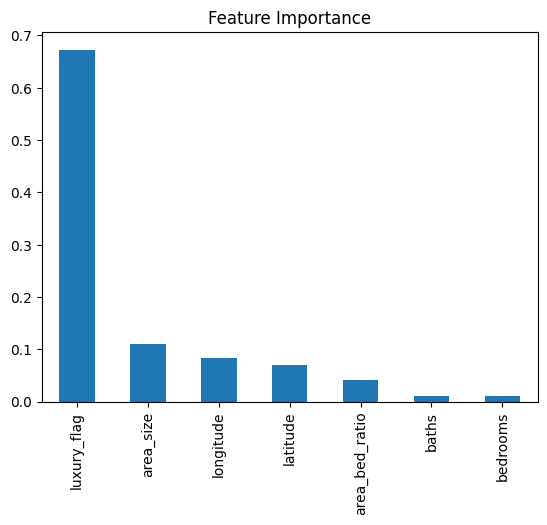

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure()
importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()
